In [151]:
import time
import numpy as np
import os
import json

from ase.io import read, write
from ase import Atoms
from ase.io import read, write
from ase.io import Trajectory
from reactML.common.pyscf2ase import ase_to_string, PySCF_calculator


In [152]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight': 'normal',
        'size': 25}
matplotlib.rc('font', **font)

In [153]:
def read_thermo_analysis(file_name):
    with open(file_name, 'r') as fp:
        read_json = json.load(fp)

    # Extract individual Gibbs energy contributions
    G_elec = read_json['G_elec'][0]  # Electronic contribution
    G_trans = read_json['G_trans'][0]  # Translational contribution
    G_rot = read_json['G_rot'][0]     # Rotational contribution
    G_vib = read_json['G_vib'][0]     # Vibrational contribution

    # Check if G_rot is nan and assign zero if true
    if np.isnan(G_rot):
        G_rot = 0

    # Calculate total Gibbs free energy
    G_tot = G_elec + G_trans + G_rot + G_vib


    G_tot_Eh = G_tot # in Hartree
    G_tot_eV = G_tot_Eh * 27.2114 # in eV

    return read_json, G_tot_eV

def update_Gibbs_combo(Gibbs_dict, mol_1 = 'H2O', mol_2 = 'PF5'):
    Gibbs_dict.update({mol_1+'+'+mol_2: Gibbs_dict[mol_1] + Gibbs_dict[mol_2]})


In [154]:

Gibbs_dict = {}

mol_name = 'H2O'
thermo_analysis, G_tot_eV = read_thermo_analysis(file_name= './structures/INPUT_'+mol_name+'.xyz/thermo_analysis.json')

Gibbs_dict[mol_name] = G_tot_eV


In [155]:
file_list = os.listdir('./structures/')
for file in file_list:
    if 'INPUT' in file:
        mol_name = file.split('_')[-1]
        mol_name = mol_name.split('.')[0]
        # print(mol_name)
        try:
            thermo_analysis, G_tot_eV = read_thermo_analysis(file_name= './structures/'+file+'/thermo_analysis.json')
            Gibbs_dict[mol_name] = G_tot_eV
        except:
            pass

for key in Gibbs_dict.keys():
    print(key, Gibbs_dict[key])

H2O -2080.050337723103
M22 -27087.256623844303
M26 -41720.72962428224
M11 -27551.378541207712
M19 -26896.460083341222
M29 -41912.63730234571
M15-HF -23971.318944054867
M1 -24961.481693260852
M12 -27549.848796785995
M15 -26705.25838078097
M2 -24961.306306888015
M23 -27087.901797545906
M2-HF -22227.462362112707
M25 -24163.634180642533
M21 -27087.31805754784
M24-LiF -24162.528605252577
M14 -26704.492270327748
M28 -41720.641278354575
M24 -27087.677340981667
M12-LiF -24625.067765730895
M13 -24626.180507735924
M20 -26896.360217214584
M18 -26896.42718218133
M17 -26896.933964856125
M16 -23972.260017580014
LiF -2924.771956141544
PF5 -22881.39174868462
M27 -41719.7604780755
M10 -27550.85950801223


In [156]:
update_Gibbs_combo(Gibbs_dict, mol_1 = 'H2O', mol_2 = 'PF5')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M13', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M25', mol_2 = 'LiF')

print(Gibbs_dict)

{'H2O': -2080.050337723103, 'M22': -27087.256623844303, 'M26': -41720.72962428224, 'M11': -27551.378541207712, 'M19': -26896.460083341222, 'M29': -41912.63730234571, 'M15-HF': -23971.318944054867, 'M1': -24961.481693260852, 'M12': -27549.848796785995, 'M15': -26705.25838078097, 'M2': -24961.306306888015, 'M23': -27087.901797545906, 'M2-HF': -22227.462362112707, 'M25': -24163.634180642533, 'M21': -27087.31805754784, 'M24-LiF': -24162.528605252577, 'M14': -26704.492270327748, 'M28': -41720.641278354575, 'M24': -27087.677340981667, 'M12-LiF': -24625.067765730895, 'M13': -24626.180507735924, 'M20': -26896.360217214584, 'M18': -26896.42718218133, 'M17': -26896.933964856125, 'M16': -23972.260017580014, 'LiF': -2924.771956141544, 'PF5': -22881.39174868462, 'M27': -41719.7604780755, 'M10': -27550.85950801223, 'H2O+PF5': -24961.442086407722, 'M13+LiF': -27550.952463877467, 'M25+LiF': -27088.406136784077}


In [157]:
thermo_analysis, G_tot_eV = read_thermo_analysis(file_name= './structures/INPUT_H2O.xyz/thermo_analysis.json')

[-27550.85950801223, -27551.378541207712, -27549.848796785995, -27550.952463877467]


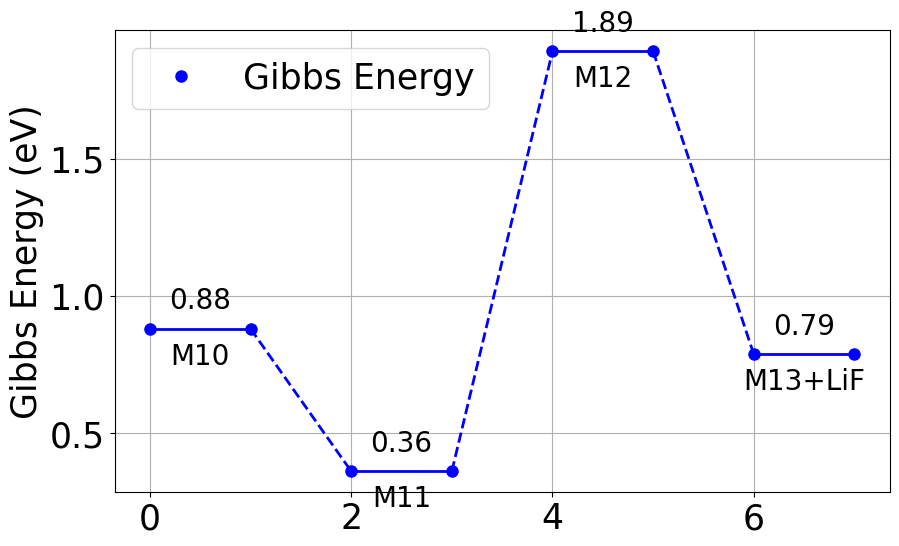

In [158]:
compound_list = ['M10', 'M11', 'M12', 'M13+LiF']
Gibbs_list = [Gibbs_dict[compound] for compound in compound_list]
print(Gibbs_list)
Gibbs_list = np.array(Gibbs_list) - np.array(Gibbs_list[0]) + 0.88


############################### 


# Create repeated values for step plot
y = np.repeat(Gibbs_list, 2)

x_label = compound_list.copy()
x = np.arange(len(y))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot segments with different line styles based on value changes
for i in range(0, len(y)-1):
    if y[i] == y[i+1]:
        # Same value - solid line
        plt.plot(x[i:i+2], y[i:i+2], 'b-', linewidth=2)
    else:
        # Different value - dashed line
        plt.plot(x[i:i+2], y[i:i+2], 'b--', linewidth=2)

# Add points at the compound positions
plt.plot(np.arange(0, len(y), 1), y, 'bo', markersize=8, label='Gibbs Energy')

# Add text annotations above the solid line segments
for i in range(0, len(y)-1, 2):
    if y[i] == y[i+1]:
        plt.text(x[i] + 0.5, y[i] + 0.05, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
        plt.text(x[i] + 0.5, y[i] - 0.05, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)

# plt.xlabel('Index')
plt.ylabel('Gibbs Energy (eV)')
# plt.title('Step Plot of Gibbs Energy')
plt.legend()
plt.grid(True)


[-24961.442086407722, -24961.481693260852]


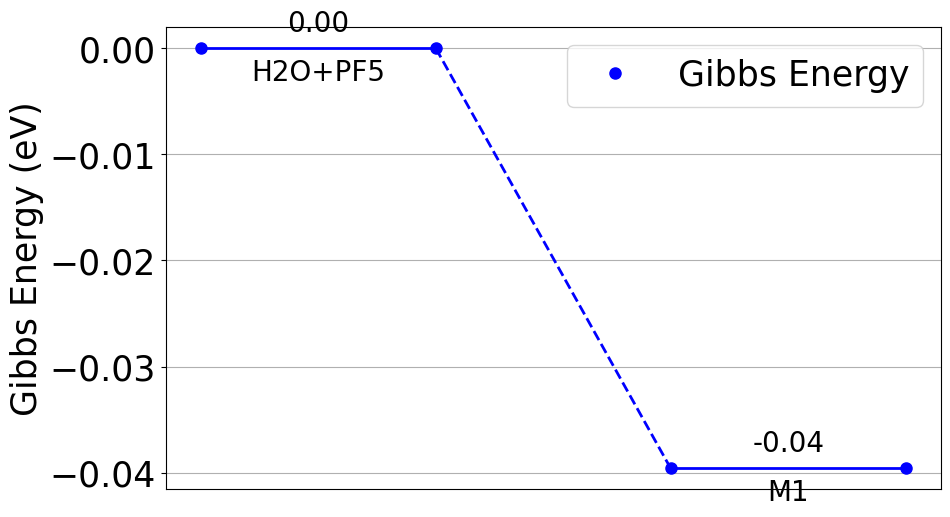

In [159]:
compound_list = ['H2O+PF5', 'M1',]
Gibbs_list = [Gibbs_dict[compound] for compound in compound_list]
print(Gibbs_list)
Gibbs_list = np.array(Gibbs_list) - np.array(Gibbs_list[0]) + 0

y_dist = 0.001

############################### 


# Create repeated values for step plot
y = np.repeat(Gibbs_list, 2)

x_label = compound_list.copy()
x = np.arange(len(y))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot segments with different line styles based on value changes
for i in range(0, len(y)-1):
    if y[i] == y[i+1]:
        # Same value - solid line
        plt.plot(x[i:i+2], y[i:i+2], 'b-', linewidth=2)
    else:
        # Different value - dashed line
        plt.plot(x[i:i+2], y[i:i+2], 'b--', linewidth=2)

# Add points at the compound positions
plt.plot(np.arange(0, len(y), 1), y, 'bo', markersize=8, label='Gibbs Energy')

# Add text annotations above the solid line segments
for i in range(0, len(y)-1, 2):
    if y[i] == y[i+1]:
        plt.text(x[i] + 0.5, y[i] + y_dist, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
        plt.text(x[i] + 0.5, y[i] - y_dist, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)

# plt.xlabel('Index')
plt.ylabel('Gibbs Energy (eV)')
plt.xticks([])
# plt.xlabel('')
# plt.title('Step Plot of Gibbs Energy')
plt.legend()
plt.grid(True)


[-27087.31805754784, -27087.256623844303, -27087.901797545906, -27087.677340981667, -27088.406136784077]


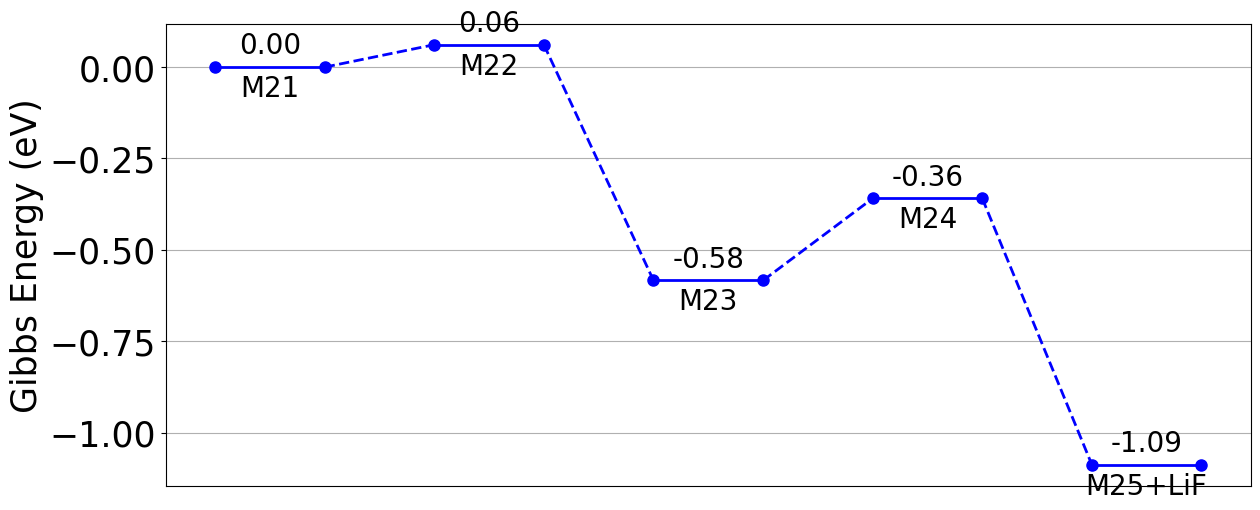

In [160]:
compound_list = ['M21', 'M22', 'M23', 'M24', 'M25+LiF']
Gibbs_list = [Gibbs_dict[compound] for compound in compound_list]
print(Gibbs_list)
Gibbs_list = np.array(Gibbs_list) - np.array(Gibbs_list[0]) + 0

y_dist = 0.02

############################### 


# Create repeated values for step plot
y = np.repeat(Gibbs_list, 2)

x_label = compound_list.copy()
x = np.arange(len(y))

# Create the plot
plt.figure(figsize=(14, 6))

# Plot segments with different line styles based on value changes
for i in range(0, len(y)-1):
    if y[i] == y[i+1]:
        # Same value - solid line
        plt.plot(x[i:i+2], y[i:i+2], 'b-', linewidth=2)
    else:
        # Different value - dashed line
        plt.plot(x[i:i+2], y[i:i+2], 'b--', linewidth=2)

# Add points at the compound positions
plt.plot(np.arange(0, len(y), 1), y, 'bo', markersize=8, label='Gibbs Energy')

# Add text annotations above the solid line segments
for i in range(0, len(y)-1, 2):
    if y[i] == y[i+1]:
        plt.text(x[i] + 0.5, y[i] + y_dist, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
        plt.text(x[i] + 0.5, y[i] - y_dist, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)

# plt.xlabel('Index')
plt.ylabel('Gibbs Energy (eV)')
plt.xticks([])
# plt.xlabel('')
# plt.title('Step Plot of Gibbs Energy')
# plt.legend()
plt.grid(True)


[-41720.72962428224, -41719.7604780755, -41720.641278354575]


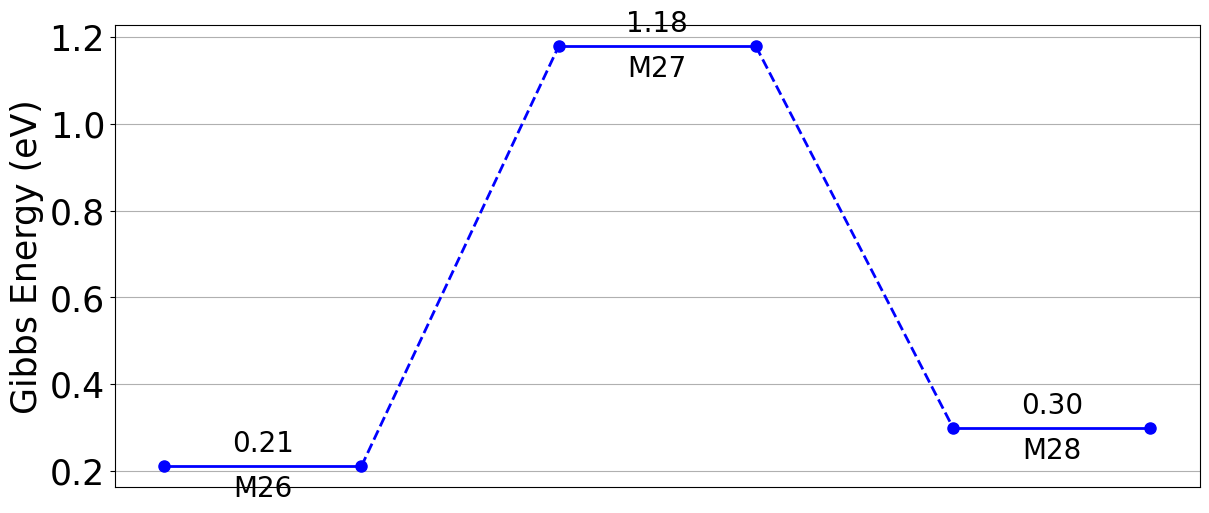

In [161]:
compound_list = ['M26', 'M27', 'M28', ]
Gibbs_list = [Gibbs_dict[compound] for compound in compound_list]
print(Gibbs_list)
Gibbs_list = np.array(Gibbs_list) - np.array(Gibbs_list[0]) + 0.21

y_dist = 0.02

############################### 


# Create repeated values for step plot
y = np.repeat(Gibbs_list, 2)

x_label = compound_list.copy()
x = np.arange(len(y))

# Create the plot
plt.figure(figsize=(14, 6))

# Plot segments with different line styles based on value changes
for i in range(0, len(y)-1):
    if y[i] == y[i+1]:
        # Same value - solid line
        plt.plot(x[i:i+2], y[i:i+2], 'b-', linewidth=2)
    else:
        # Different value - dashed line
        plt.plot(x[i:i+2], y[i:i+2], 'b--', linewidth=2)

# Add points at the compound positions
plt.plot(np.arange(0, len(y), 1), y, 'bo', markersize=8, label='Gibbs Energy')

# Add text annotations above the solid line segments
for i in range(0, len(y)-1, 2):
    if y[i] == y[i+1]:
        plt.text(x[i] + 0.5, y[i] + y_dist, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
        plt.text(x[i] + 0.5, y[i] - y_dist, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)

# plt.xlabel('Index')
plt.ylabel('Gibbs Energy (eV)')
plt.xticks([])
# plt.xlabel('')
# plt.title('Step Plot of Gibbs Energy')
# plt.legend()
plt.grid(True)
